1.Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree



In [2]:
df= pd.read_csv('trend.csv')

# Display the shape of the DataFrame
print(df.shape)

# Display basic statistics, first few rows, and info about the DataFrame
print(df.describe())

# Display the first few rows of the DataFrame
print(df.head())

# Display information about the DataFrame
print(df.info())

(3900, 18)
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0

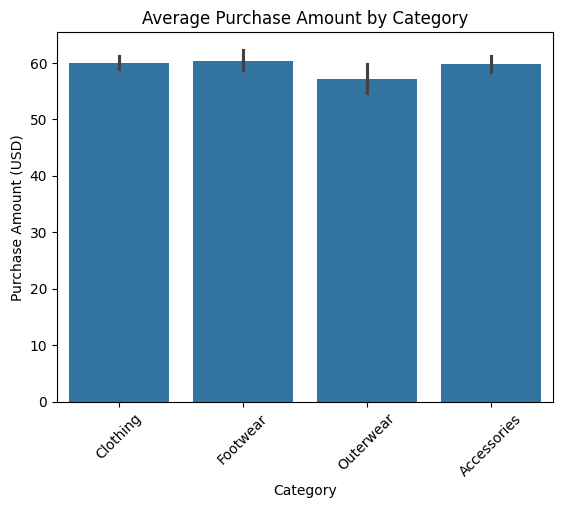

In [3]:
#1.Bar plot of average purchase amount by category
sns.barplot(data=df, x='Category', y='Purchase Amount (USD)', estimator='mean')
plt.title('Average Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()


Helps understand which product categories bring in higher spending. 
All categories are almost same but outerwear has less purchase amount

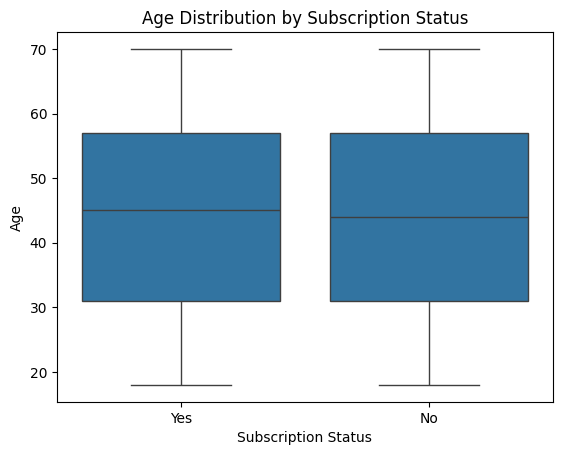

In [4]:
#2. Box plot of age distribution by subscription status
sns.boxplot(data=df, x='Subscription Status', y='Age')
plt.title('Age Distribution by Subscription Status')
plt.show()


Compares age ranges of subscribed vs non-subscribed customers.
Age alone does not significantly affect subscription status since the distributions are quite similar.

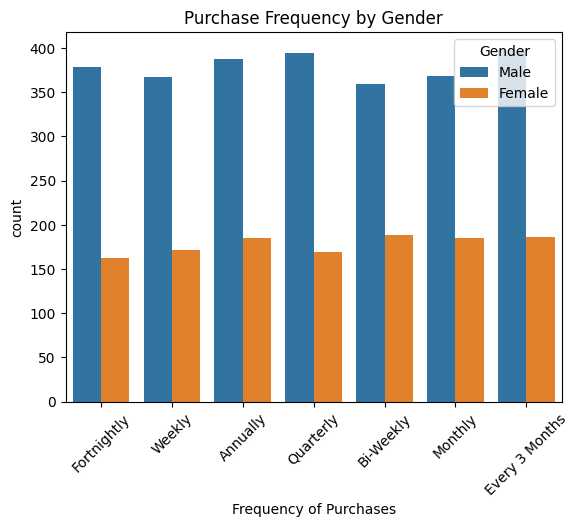

In [5]:
#3. Count plot of purchase frequency
sns.countplot(data=df, x='Frequency of Purchases', hue='Gender')
plt.title('Purchase Frequency by Gender')
plt.xticks(rotation=45)
plt.show()


See whether males or females shop more frequently in each frequency group.
here we can see Male has higher count of puchase 

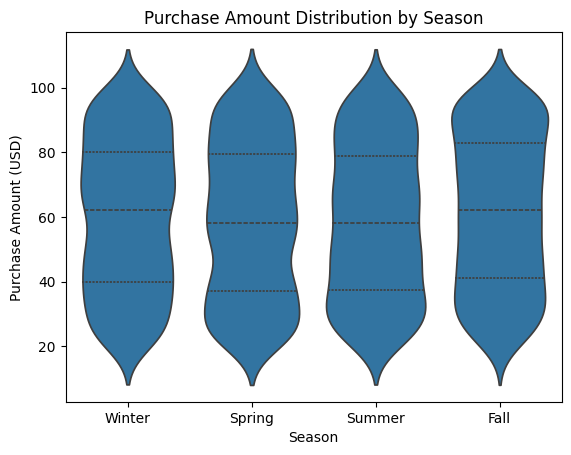

In [6]:
#4. Line plot of average purchase amount over time
sns.violinplot(data=df, x='Season', y='Purchase Amount (USD)', inner='quartile')
plt.title('Purchase Amount Distribution by Season')
plt.show()


There is no strong seasonal trend in purchase amount.
Customers tend to either spend on the lower or higher end, regardless of season.
Promotional efforts or discounts may have consistent effects across seasons.

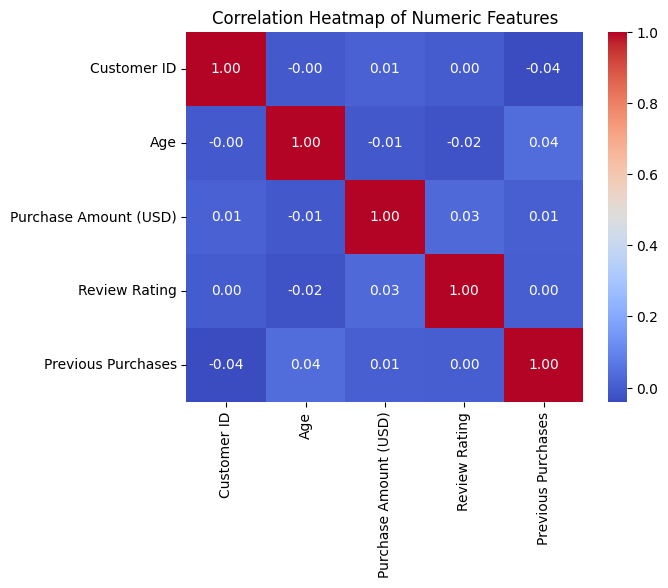

In [7]:
#5. Heatmap of correlation between numeric features
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


These numerical features are likely independent of each other.

2. Data Preprocessing:

In [8]:


df_encoded = df.copy()
label_encoders = {}

# Identify object (categorical/text) columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # store encoder for later inverse transform if needed


In [9]:
initial_rows = df.shape[0]
df_cleaned = df.dropna()
final_rows = df_cleaned.shape[0]
print(f"Rows before cleaning: {initial_rows}, Rows after cleaning: {final_rows}")

Rows before cleaning: 3900, Rows after cleaning: 3900


3. Correlation Analysis:

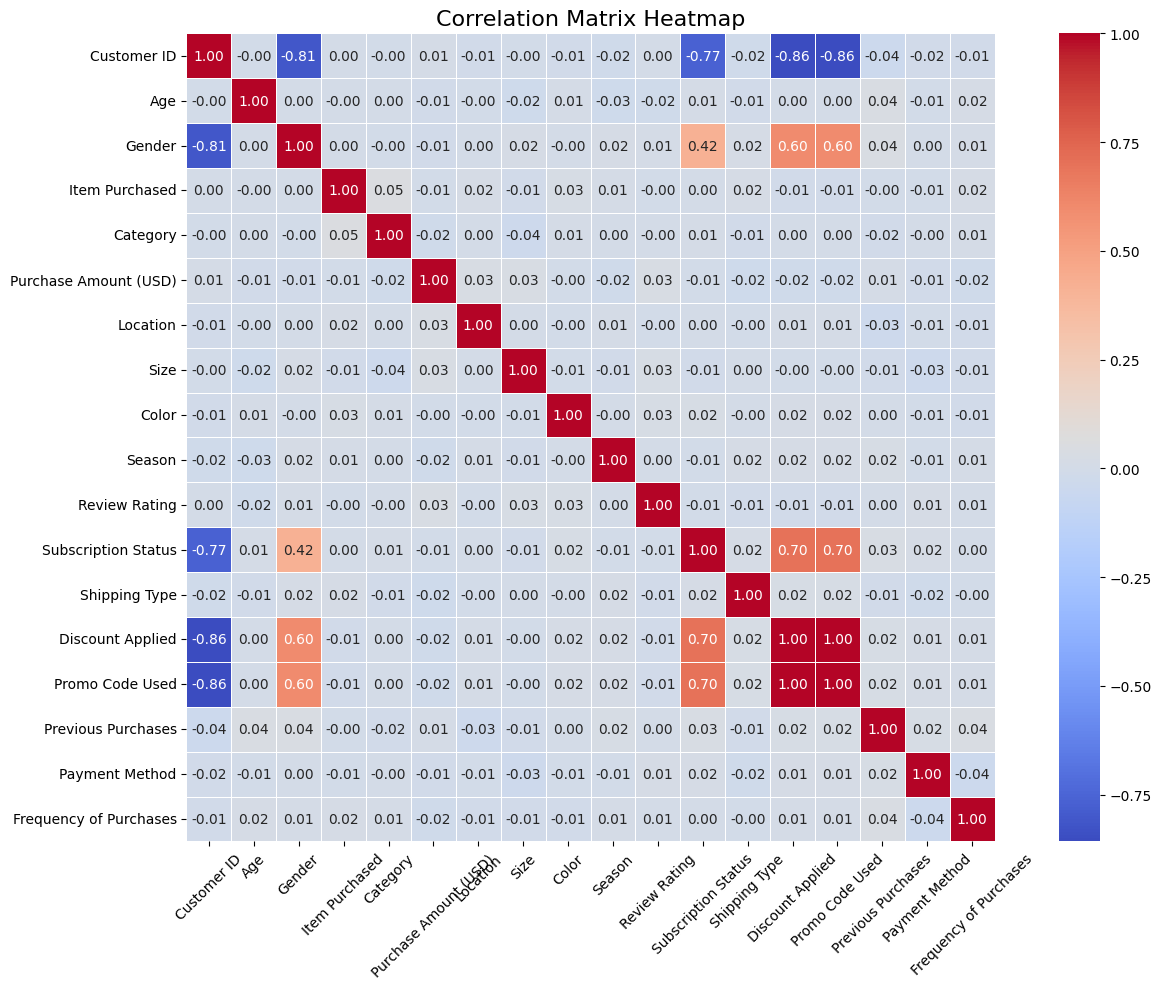

In [10]:
corr_matrix = df_encoded.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


these numerical features are likely independent of each other.

Intercept: 59.43
Slope: 0.01
R-squared: 0.0001


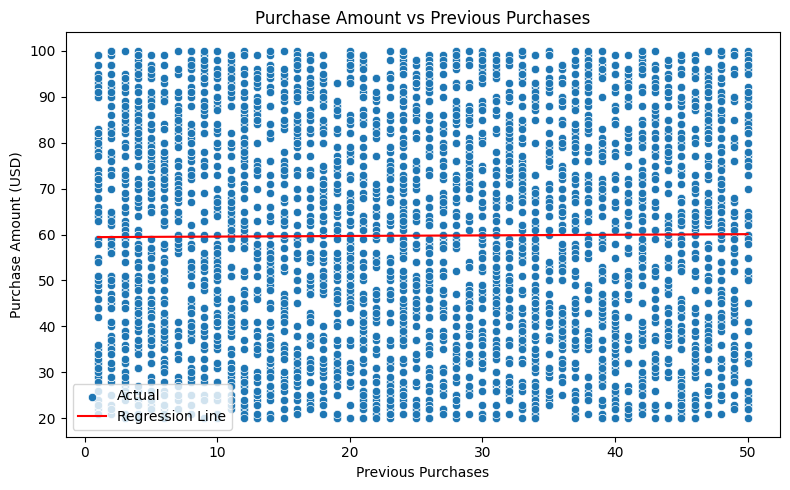

Predicted Purchase Amount for 5 previous purchases: $59.50
Predicted Purchase Amount for 10 previous purchases: $59.56
Predicted Purchase Amount for 15 previous purchases: $59.63


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# X = Previous Purchases
X = df_encoded[['Previous Purchases']]
y = df_encoded['Purchase Amount (USD)']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

intercept = model.intercept_
slope = model.coef_[0]
r2 = r2_score(y, y_pred)


intercept = model.intercept_
slope = model.coef_[0]
r2 = r2_score(y, y_pred)

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Previous Purchases'], y=y, label='Actual')
sns.lineplot(x=X['Previous Purchases'], y=y_pred, color='red', label='Regression Line')
plt.title('Purchase Amount vs Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.tight_layout()
plt.show()

new_data = [[5], [10], [15]]
predictions = model.predict(new_data)

for prev, amount in zip([5, 10, 15], predictions):
    print(f"Predicted Purchase Amount for {prev} previous purchases: ${amount:.2f}")



Both variables produce very low R-squared, indicating almost no linear relationship.

In [12]:
df_ml = df.copy()
le_gender = LabelEncoder()
le_location = LabelEncoder()

df_ml['Gender_encoded'] = le_gender.fit_transform(df_ml['Gender'].astype(str))
df_ml['Location_encoded'] = le_location.fit_transform(df_ml['Location'].astype(str))

X = df_ml[['Age', 'Gender_encoded', 'Location_encoded', 'Review Rating']]
y = df_ml['Purchase Amount (USD)']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

coefficients = model.coef_
intercept = model.intercept_
r2 = r2_score(y, y_pred)

features = ['Age', 'Gender', 'Location', 'Review Rating']

print(f"Intercept: {intercept:.2f}")
print("Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"  {feature}: {coef:.2f}")

print(f"\nR-squared: {r2:.4f}")



Intercept: 55.94
Coefficients:
  Age: -0.02
  Gender: -0.73
  Location: 0.05
  Review Rating: 1.02

R-squared: 0.0021


Very low R-squared suggests that these variables are not strong predictors of spending.

Despite multiple inputs, the model still explains almost nothing — indicating other hidden factors drive purchase behavior.

In [13]:
df_log = df.copy()

# Encode 'Gender' and 'Subscription Status'
le_gender = LabelEncoder()
le_sub = LabelEncoder()

df_log['Gender_encoded'] = le_gender.fit_transform(df_log['Gender'].astype(str))
df_log['Subscription_encoded'] = le_sub.fit_transform(df_log['Subscription Status'].astype(str))


In [14]:
X = df_log[['Age', 'Gender_encoded', 'Review Rating']]
y = df_log['Subscription_encoded']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Intercept: -5.299587806788136
Coefficients:
  Age: 0.0007
  Gender_encoded: 4.9003
  Review Rating: -0.0173
Accuracy: 0.7154
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


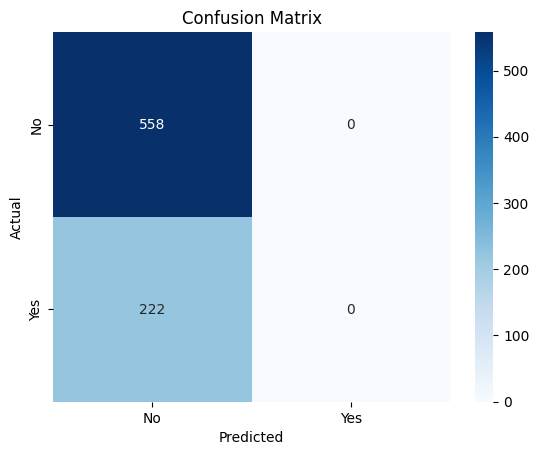

In [16]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

print("Intercept:", log_model.intercept_[0])
print("Coefficients:")
for feature, coef in zip(X.columns, log_model.coef_[0]):
    print(f"  {feature}: {coef:.4f}")

y_pred = log_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_sub.classes_, yticklabels=le_sub.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Decision Tree Regression Evaluation:
MAE: 20.82
MSE: 569.32
R²: -0.0174


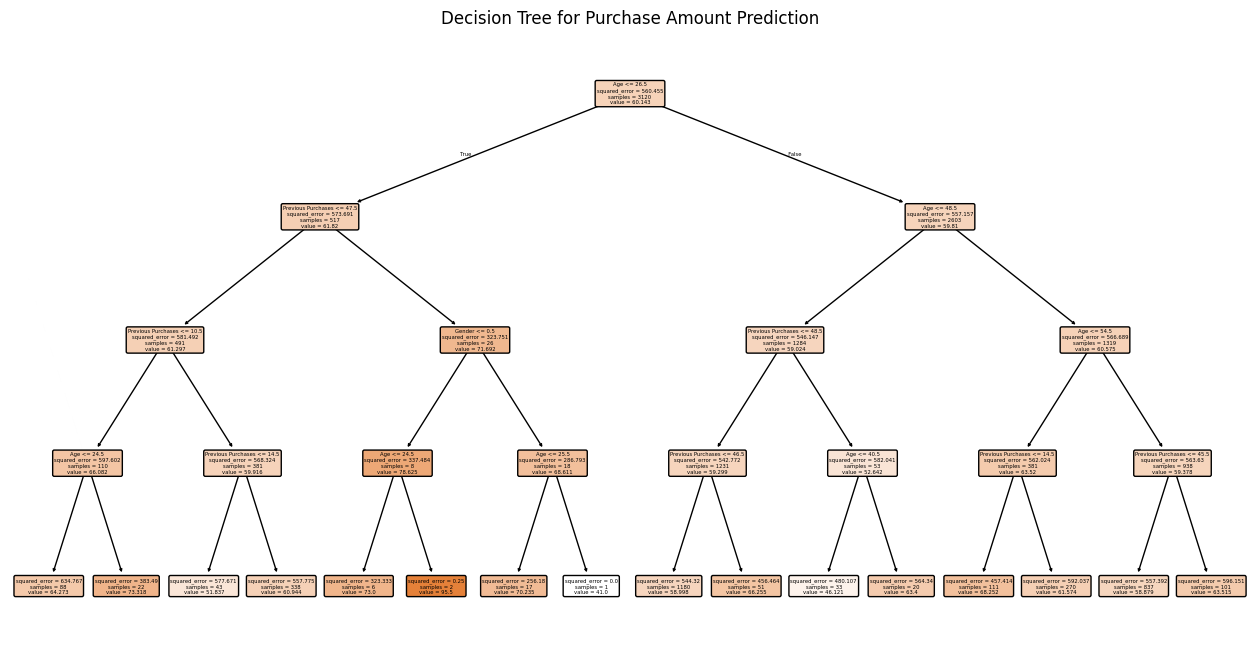

In [17]:
df_tree = df_encoded.copy()

# Define features and target
X = df_tree[['Age', 'Gender', 'Previous Purchases']]
y = df_tree['Purchase Amount (USD)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# Visualize the decision tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Purchase Amount Prediction")
plt.show()
